In [ ]:
import pandas as pd

# Load the enhanced synthetic dataset
df = pd.read_csv('/content/updated_synthetic_battery_data (1).csv')

# Display the first few rows of the dataset to ensure it's loaded correctly
df.head()


,DeviceID,ChargingCycle,BatteryLevel,ChargingTime,DeviceModel,Temperature,ChargingCurrent,UsagePattern,TimeToFullCharge,UserBehavior,BatteryHealth,HeavyChargingBehavior
0,Device_1,1,6.514450,75.186213,Earbuds,38.344201,0.513348,Night,110.900087,Occasional,90.827899,No
1,Device_2,2,6.638488,36.850961,Apple Pencil,31.985729,1.872845,Day,90.017941,Frequent,94.007135,Yes
2,Device_3,3,55.349759,42.552388,Apple Pencil,31.234621,2.004113,Day,60.830758,Frequent,94.382690,Yes
3,Device_4,4,46.408372,65.756933,Apple Pencil,39.385186,1.912697,Day,132.318756,Frequent,90.307407,No
4,Device_5,5,5.553769,99.138716,S Pen,29.079985,1.153077,Night,161.276862,Frequent,95.460007,No


In [ ]:
# Check for missing values
df.isnull().sum()

# Check the data types of each column
df.dtypes


,0
DeviceID,object
ChargingCycle,int64
BatteryLevel,float64
ChargingTime,float64
DeviceModel,object
Temperature,float64
ChargingCurrent,float64
UsagePattern,object
TimeToFullCharge,float64
UserBehavior,object


In [ ]:
# Defining the charging state transitions
def charging_state(row):
    if row['BatteryLevel'] < 20:
        return 'Charging'  # Transition to Charging
    elif row['BatteryLevel'] == 100:
        return 'Full Charge'  # Full charge reached
    elif row['BatteryLevel'] > 80:
        return 'Idle'  # Pause charging if battery > 80%
    return 'Charging'  # Default state if none of the conditions are met

# Apply the function to the dataset
df['ChargingState'] = df.apply(charging_state, axis=1)

# Check the first few entries with the new charging state column
df[['DeviceID', 'ChargingCycle', 'BatteryLevel', 'ChargingState']].head()


,DeviceID,ChargingCycle,BatteryLevel,ChargingState
0,Device_1,1,6.514450,Charging
1,Device_2,2,6.638488,Charging
2,Device_3,3,55.349759,Charging
3,Device_4,4,46.408372,Charging
4,Device_5,5,5.553769,Charging


In [ ]:
import numpy as np
import pandas as pd

# Example synthetic dataset
df = pd.read_csv('/content/updated_synthetic_battery_data (1).csv')

# Kalman Filter Implementation for smoothing Battery Level

# Initialize variables
n = len(df)  # Number of data points
x = np.zeros(n)  # Estimated battery levels (Smoothed values)
P = np.ones(n) * 1  # Estimate error covariance
Q = 1e-5  # Process noise covariance
R = 0.1  # Measurement noise covariance
K = np.zeros(n)  # Kalman gain

# Initial estimate for the first point
x[0] = df['BatteryLevel'][0]
P[0] = 1.0

# Kalman filter loop
for i in range(1, n):
    # Prediction Step
    x_pred = x[i-1]  # Predicted state (battery level)
    P_pred = P[i-1] + Q  # Predicted covariance

    # Update Step
    K[i] = P_pred / (P_pred + R)  # Kalman Gain
    x[i] = x_pred + K[i] * (df['BatteryLevel'][i] - x_pred)  # Update estimate
    P[i] = (1 - K[i]) * P_pred  # Update covariance

# Add the smoothed battery level to the dataframe
df['SmoothedBatteryLevel'] = x

# Display the first few rows with the smoothed battery level
df[['DeviceID', 'ChargingCycle', 'BatteryLevel', 'SmoothedBatteryLevel']].head()


,DeviceID,ChargingCycle,BatteryLevel,SmoothedBatteryLevel
0,Device_1,1,6.514450,6.514450
1,Device_2,2,6.638488,6.627212
2,Device_3,3,55.349759,29.829772
3,Device_4,4,46.408372,35.178679
4,Device_5,5,5.553769,27.950406


In [ ]:
# Adjusting the Kalman filter parameters
Q = 1e-5  # Process noise covariance (keeping it small)
R = 0.05  # Measurement noise covariance (reducing measurement noise impact)

# Re-initialize variables for adjusted filter
x = np.zeros(n)  # Estimated battery levels (Smoothed values)
P = np.ones(n) * 1  # Estimate error covariance
K = np.zeros(n)  # Kalman gain

# Initial estimate for the first point
x[0] = df['BatteryLevel'][0]
P[0] = 1.0

# Apply Kalman filter with adjusted parameters
for i in range(1, n):
    # Prediction Step
    x_pred = x[i-1]  # Predicted state (battery level)
    P_pred = P[i-1] + Q  # Predicted covariance

    # Update Step
    K[i] = P_pred / (P_pred + R)  # Kalman Gain
    x[i] = x_pred + K[i] * (df['BatteryLevel'][i] - x_pred)  # Update estimate
    P[i] = (1 - K[i]) * P_pred  # Update covariance

# Add the smoothed battery level to the dataframe
df['SmoothedBatteryLevel'] = x

# Display the first few rows with the smoothed battery level
df[['DeviceID', 'ChargingCycle', 'BatteryLevel', 'SmoothedBatteryLevel']].head()


,DeviceID,ChargingCycle,BatteryLevel,SmoothedBatteryLevel
0,Device_1,1,6.514450,6.514450
1,Device_2,2,6.638488,6.632581
2,Device_3,3,55.349759,30.399620
3,Device_4,4,46.408372,35.650218
4,Device_5,5,5.553769,28.213636


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

# Prepare the data for the neural network
X = df[['ChargingTime', 'BatteryLevel', 'Temperature', 'ChargingCurrent']]  # Features
y = df['TimeToFullCharge']  # Target variable (time to full charge)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Neural Network model
nn_model = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)
nn_model.fit(X_train_scaled, y_train)

# Predict and evaluate the model
y_pred = nn_model.predict(X_test_scaled)

# Display some predictions vs actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predictions.head()


,Actual,Predicted
33553,84.426420,119.203781
9427,99.001736,120.524861
199,143.994023,120.292644
12447,146.157588,121.408118
39489,100.817755,119.006600


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared: {r2}')


Mean Squared Error (MSE): 1210.7384081002522
R-squared: -0.001397821790233289


In [ ]:
import numpy as np
import pandas as pd

# Let's load the synthetic dataset for the first step
df = pd.read_csv('/content/updated_synthetic_battery_data (1).csv')

# Function to simulate charging state transitions based on battery level
def charging_logic(row):
    if row['BatteryLevel'] > 80:
        return 'Paused Charging'  # Pause charging if battery is above 80%
    elif row['BatteryLevel'] < 30:
        return 'Charging'  # Resume charging if battery is below 30%
    elif row['BatteryLevel'] >= 30 and row['BatteryLevel'] <= 80:
        return 'Charging'  # Continue charging between 30-80%
    else:
        return 'Idle'  # If all conditions fail (for instance, charging is idle)

# Apply the charging logic to the dataset
df['ChargingState'] = df.apply(charging_logic, axis=1)

# Display the first few rows to confirm the state transitions
df[['DeviceID', 'BatteryLevel', 'ChargingState']].head()


,DeviceID,BatteryLevel,ChargingState
0,Device_1,6.514450,Charging
1,Device_2,6.638488,Charging
2,Device_3,55.349759,Charging
3,Device_4,46.408372,Charging
4,Device_5,5.553769,Charging


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encoding categorical features like DeviceModel and UsagePattern
le_device_model = LabelEncoder()
df['DeviceModelEncoded'] = le_device_model.fit_transform(df['DeviceModel'])

le_usage_pattern = LabelEncoder()
df['UsagePatternEncoded'] = le_usage_pattern.fit_transform(df['UsagePattern'])

# Scaling numerical features for better model performance
scaler = StandardScaler()
df[['BatteryLevel', 'ChargingTime', 'Temperature']] = scaler.fit_transform(df[['BatteryLevel', 'ChargingTime', 'Temperature']])

# Define the features and target variable
X = df[['BatteryLevel', 'ChargingTime', 'Temperature', 'UserBehavior', 'DeviceModelEncoded', 'UsagePatternEncoded']]
y = df['ChargingState']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

# Encode categorical columns
le_device_model = LabelEncoder()
df['DeviceModelEncoded'] = le_device_model.fit_transform(df['DeviceModel'])

le_usage_pattern = LabelEncoder()
df['UsagePatternEncoded'] = le_usage_pattern.fit_transform(df['UsagePattern'])

le_user_behavior = LabelEncoder()
df['UserBehaviorEncoded'] = le_user_behavior.fit_transform(df['UserBehavior'])

# Encode the target variable 'ChargingState' (binary classification: Charging -> 0, Paused Charging -> 1)
le_charging_state = LabelEncoder()
df['ChargingStateEncoded'] = le_charging_state.fit_transform(df['ChargingState'])

# Check for missing values and confirm all data is encoded properly
print(f"Missing values in the dataset: \n{df.isnull().sum()}")
print(f"Data types of features:\n{df.dtypes}")

# Update the features (X) to include the encoded 'UserBehavior' column
X = df[['BatteryLevel', 'ChargingTime', 'Temperature', 'DeviceModelEncoded', 'UsagePatternEncoded', 'UserBehaviorEncoded']]

# Define the target variable (y)
y = df['ChargingStateEncoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a simple feedforward neural network
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),  # First hidden layer
    Dense(32, activation='relu'),  # Second hidden layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Missing values in the dataset: 
DeviceID                 0
ChargingCycle            0
BatteryLevel             0
ChargingTime             0
DeviceModel              0
Temperature              0
ChargingCurrent          0
UsagePattern             0
TimeToFullCharge         0
UserBehavior             0
BatteryHealth            0
HeavyChargingBehavior    0
ChargingState            0
DeviceModelEncoded       0
UsagePatternEncoded      0
UserBehaviorEncoded      0
ChargingStateEncoded     0
dtype: int64
Data types of features:
DeviceID                  object
ChargingCycle              int64
BatteryLevel             float64
ChargingTime             float64
DeviceModel               object
Temperature              float64
ChargingCurrent          float64
UsagePattern              object
TimeToFullCharge         float64
UserBehavior              object
BatteryHealth            float64
HeavyChargingBehavior     object
ChargingState             object
DeviceModelEncoded         int64
UsagePatte

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9481 - loss: 0.1266 - val_accuracy: 0.9933 - val_loss: 0.0177
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9930 - loss: 0.0180 - val_accuracy: 0.9966 - val_loss: 0.0102
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9956 - loss: 0.0113 - val_accuracy: 0.9984 - val_loss: 0.0061
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9961 - loss: 0.0092 - val_accuracy: 0.9960 - val_loss: 0.0090
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9978 - loss: 0.0071 - val_accuracy: 0.9973 - val_loss: 0.0060
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9978 - loss: 0.0057 - val_accuracy: 0.9977 - val_loss: 0.0050
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9978 - loss: 0.0059 - val_accuracy: 0.9978 - val_loss: 0.0048
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9976 - loss: 0.0056 -

In [ ]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9974 - loss: 0.0058
Test Accuracy: 99.73%
Test Loss: 0.0060


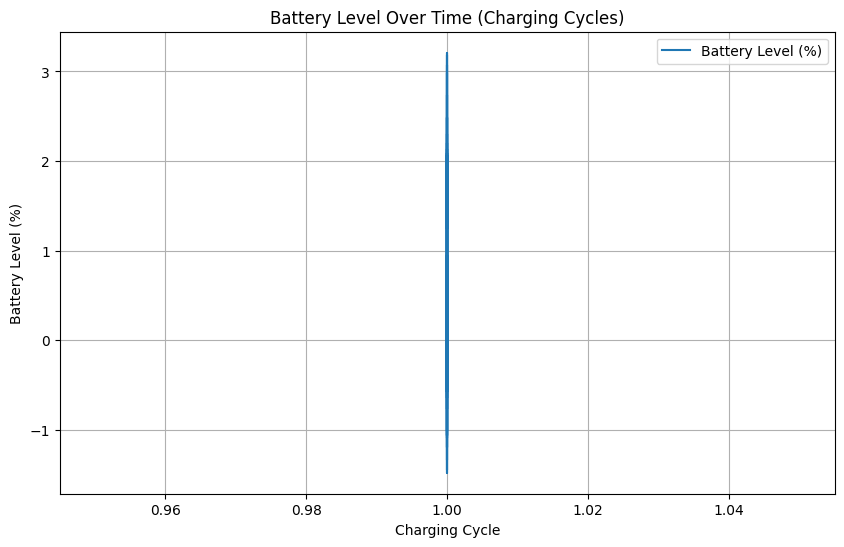

In [ ]:
import matplotlib.pyplot as plt

# Visualization of battery level over charging cycles for a sample device
sample_device = df[df['DeviceID'] == 'Device_1']  # Replace with actual device ID
plt.figure(figsize=(10, 6))
plt.plot(sample_device['ChargingCycle'], sample_device['BatteryLevel'], label="Battery Level (%)")
plt.title('Battery Level Over Time (Charging Cycles)')
plt.xlabel('Charging Cycle')
plt.ylabel('Battery Level (%)')
plt.legend()
plt.grid(True)
plt.show()


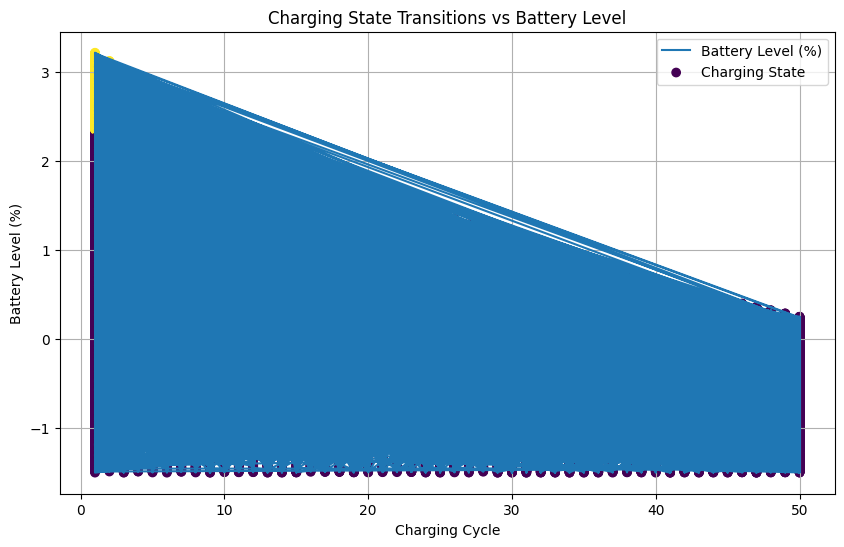

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['ChargingCycle'], df['BatteryLevel'], label="Battery Level (%)")
plt.scatter(df['ChargingCycle'], df['BatteryLevel'], c=df['ChargingStateEncoded'], cmap='viridis', label="Charging State")
plt.title('Charging State Transitions vs Battery Level')
plt.xlabel('Charging Cycle')
plt.ylabel('Battery Level (%)')
plt.legend()
plt.grid(True)
plt.show()


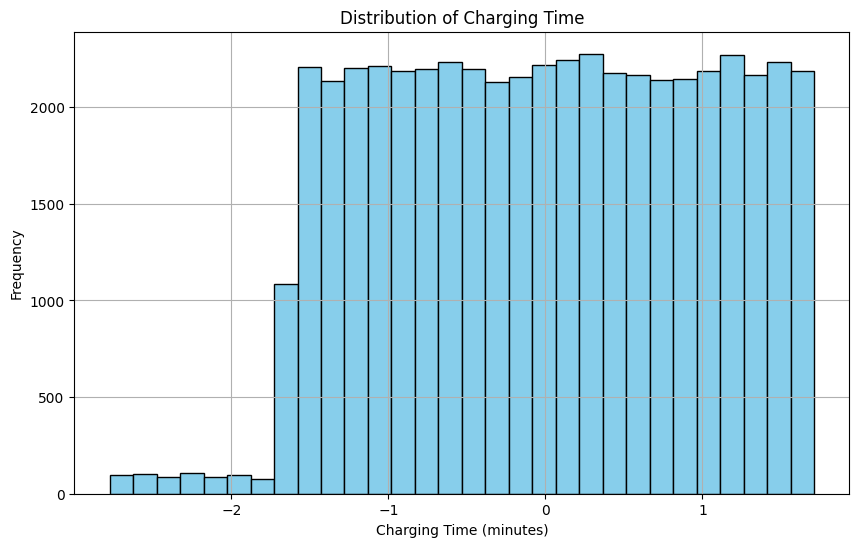

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['ChargingTime'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Charging Time')
plt.xlabel('Charging Time (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


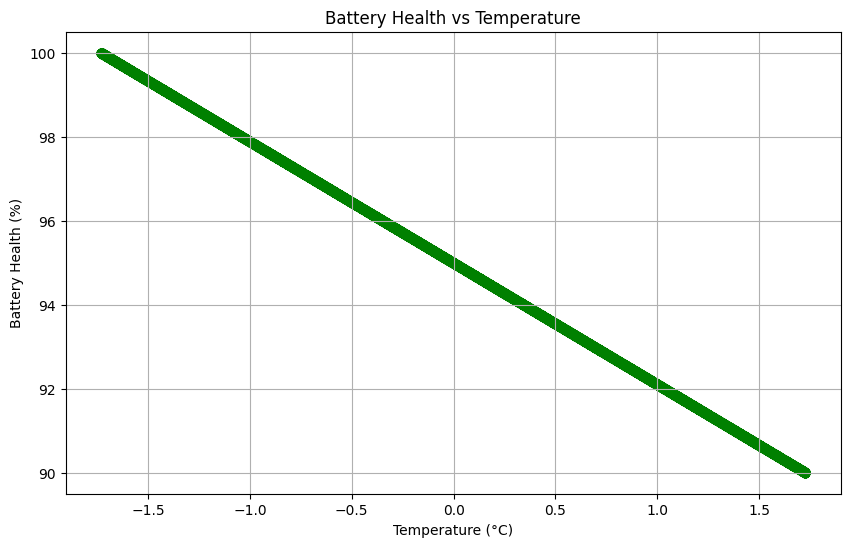

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Temperature'], df['BatteryHealth'], color='green', alpha=0.6)
plt.title('Battery Health vs Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Battery Health (%)')
plt.grid(True)
plt.show()


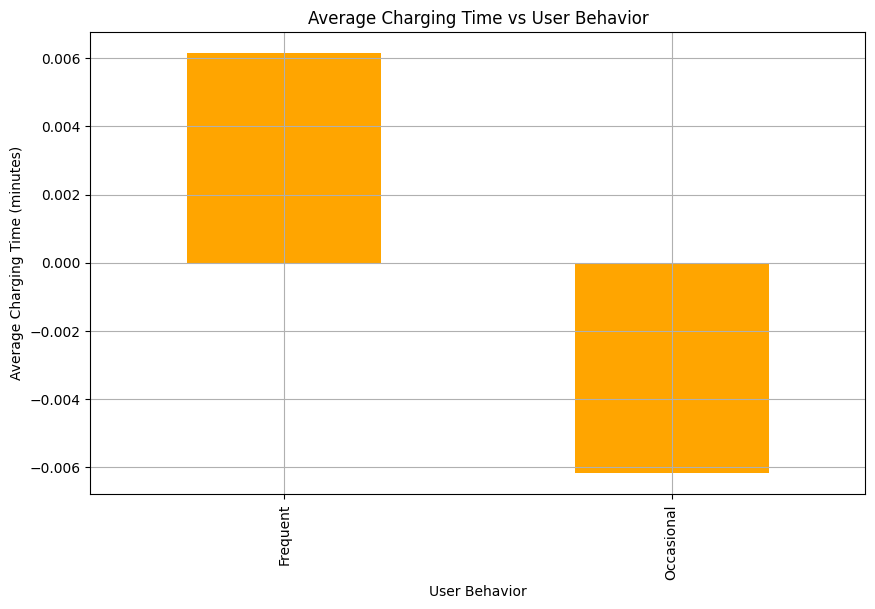

In [ ]:
plt.figure(figsize=(10, 6))
df.groupby('UserBehavior')['ChargingTime'].mean().plot(kind='bar', color='orange')
plt.title('Average Charging Time vs User Behavior')
plt.xlabel('User Behavior')
plt.ylabel('Average Charging Time (minutes)')
plt.grid(True)
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


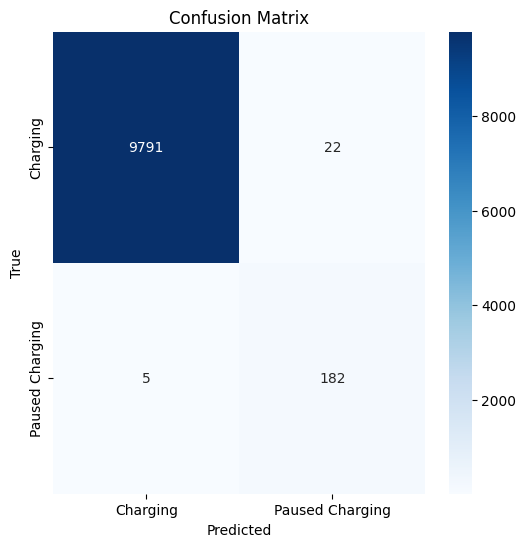

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predicting the states with the trained model
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Charging', 'Paused Charging'], yticklabels=['Charging', 'Paused Charging'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


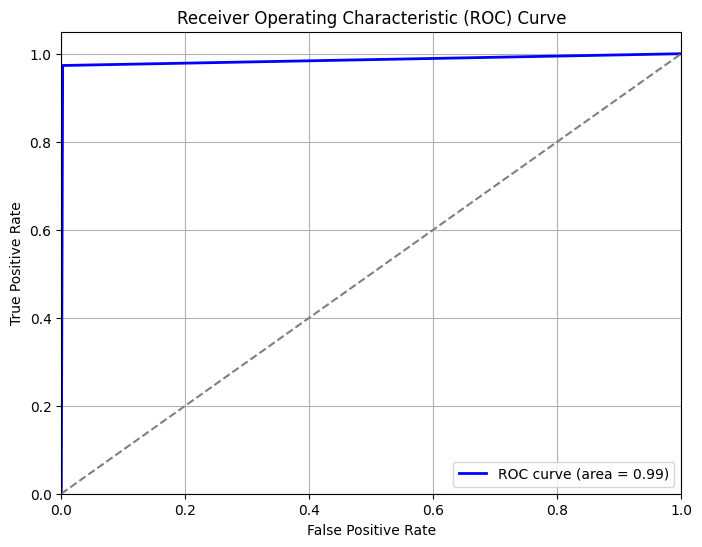

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


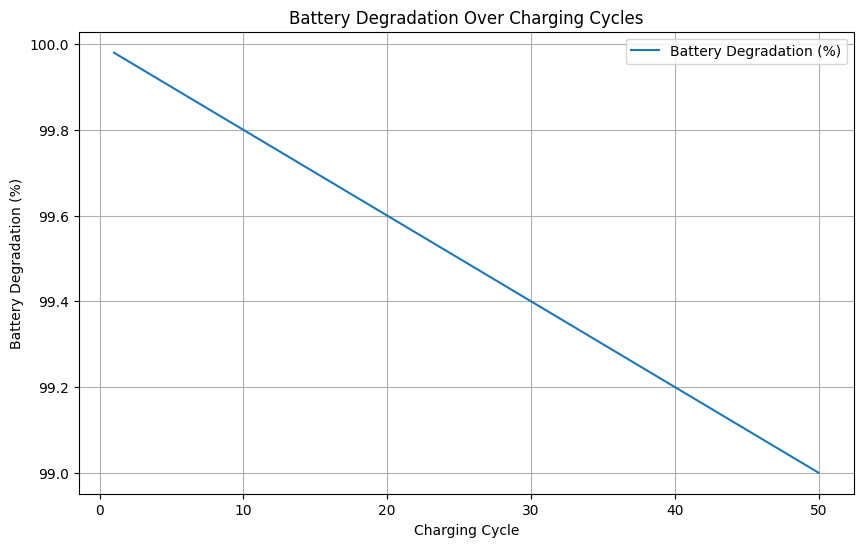

In [ ]:
# Simulate battery degradation (for illustration)
df['BatteryDegradation'] = 100 - (df['ChargingCycle'] * 0.02)  # Assuming 2% degradation per cycle

plt.figure(figsize=(10, 6))
plt.plot(df['ChargingCycle'], df['BatteryDegradation'], label="Battery Degradation (%)")
plt.title('Battery Degradation Over Charging Cycles')
plt.xlabel('Charging Cycle')
plt.ylabel('Battery Degradation (%)')
plt.legend()
plt.grid(True)
plt.show()


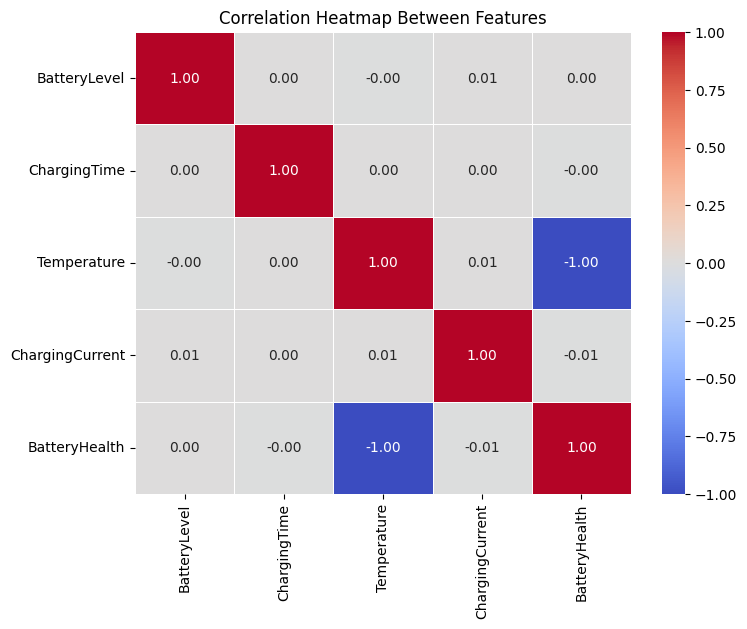

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df[['BatteryLevel', 'ChargingTime', 'Temperature', 'ChargingCurrent', 'BatteryHealth']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap Between Features')
plt.show()


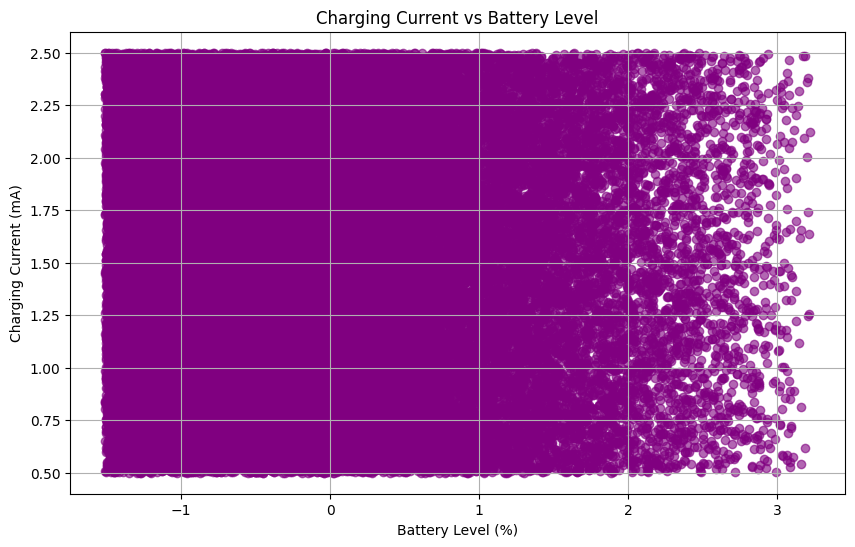

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['BatteryLevel'], df['ChargingCurrent'], alpha=0.6, color='purple')
plt.title('Charging Current vs Battery Level')
plt.xlabel('Battery Level (%)')
plt.ylabel('Charging Current (mA)')
plt.grid(True)
plt.show()


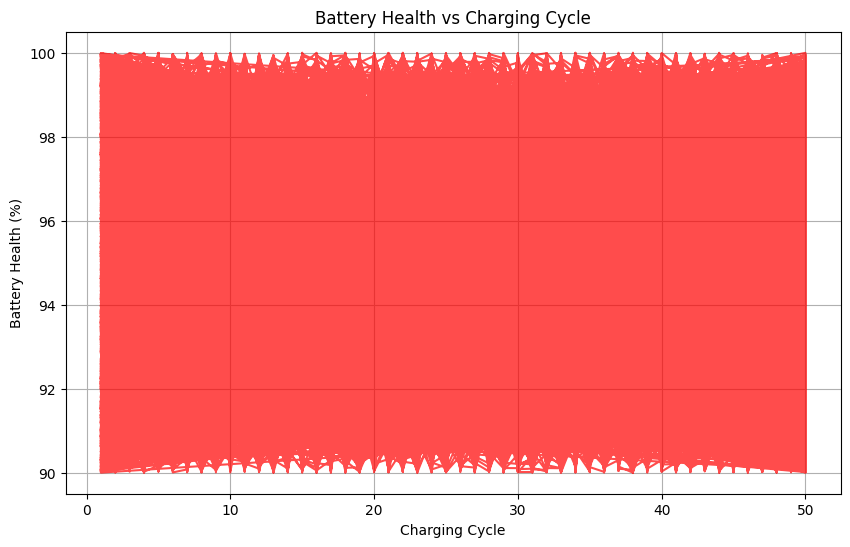

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['ChargingCycle'], df['BatteryHealth'], color='red', alpha=0.7)
plt.title('Battery Health vs Charging Cycle')
plt.xlabel('Charging Cycle')
plt.ylabel('Battery Health (%)')
plt.grid(True)
plt.show()


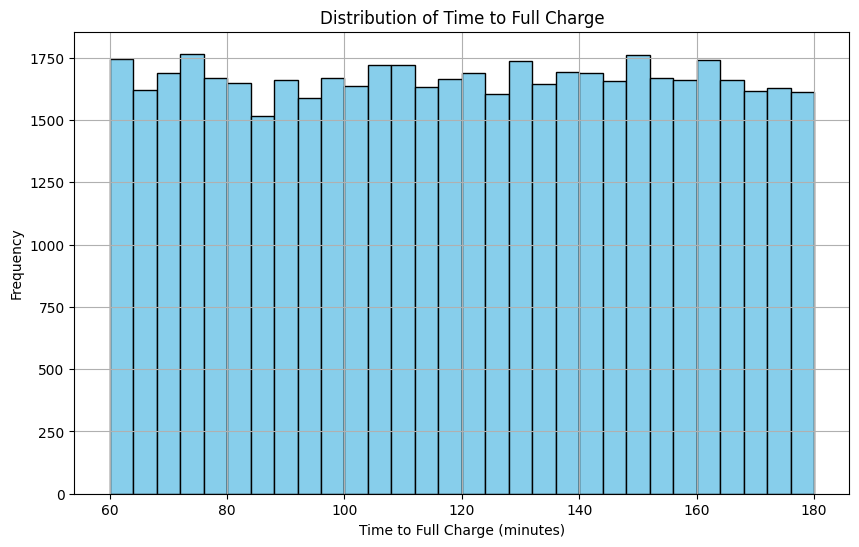

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['TimeToFullCharge'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Time to Full Charge')
plt.xlabel('Time to Full Charge (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


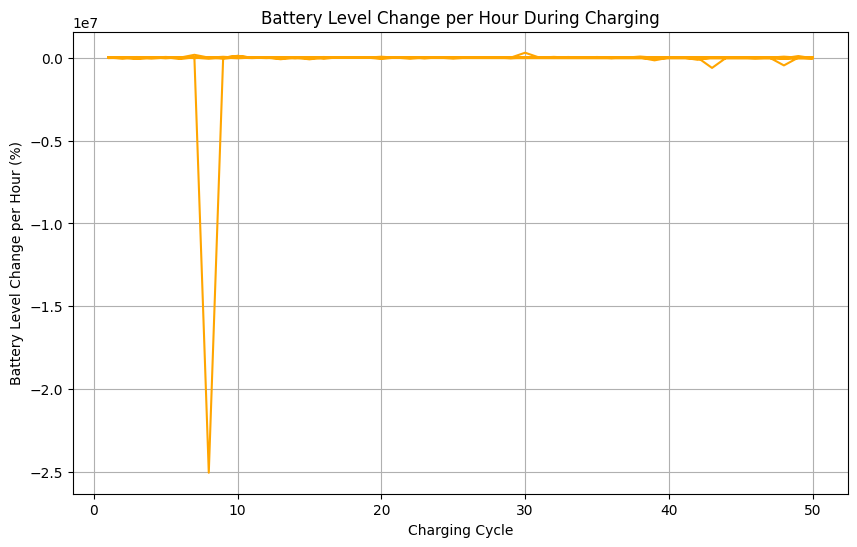

In [ ]:
df['BatteryLevelChangePerHour'] = df['BatteryLevel'].diff() / df['ChargingTime'] * 60  # Calculate per hour change
plt.figure(figsize=(10, 6))
plt.plot(df['ChargingCycle'], df['BatteryLevelChangePerHour'], color='orange')
plt.title('Battery Level Change per Hour During Charging')
plt.xlabel('Charging Cycle')
plt.ylabel('Battery Level Change per Hour (%)')
plt.grid(True)
plt.show()


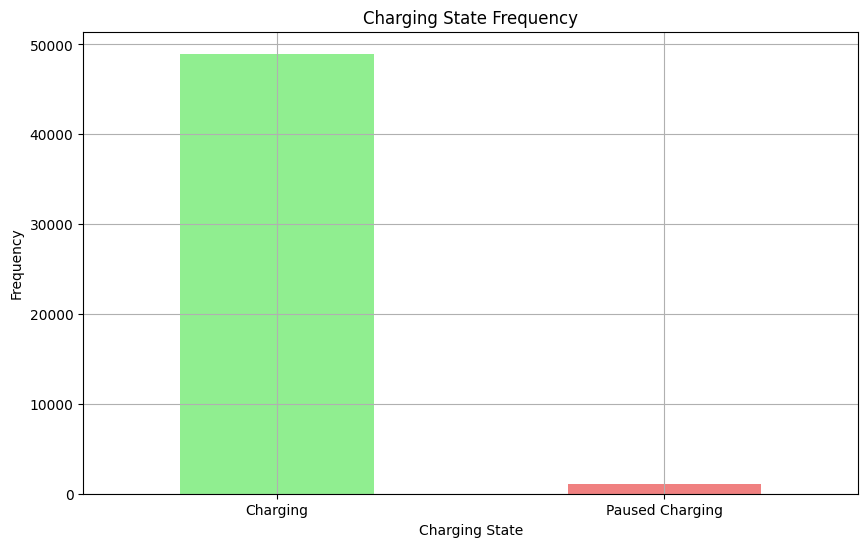

In [ ]:
plt.figure(figsize=(10, 6))
df['ChargingStateEncoded'].value_counts().plot(kind='bar', color=['lightgreen', 'lightcoral'])
plt.title('Charging State Frequency')
plt.xlabel('Charging State')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Charging', 'Paused Charging'], rotation=0)
plt.grid(True)
plt.show()


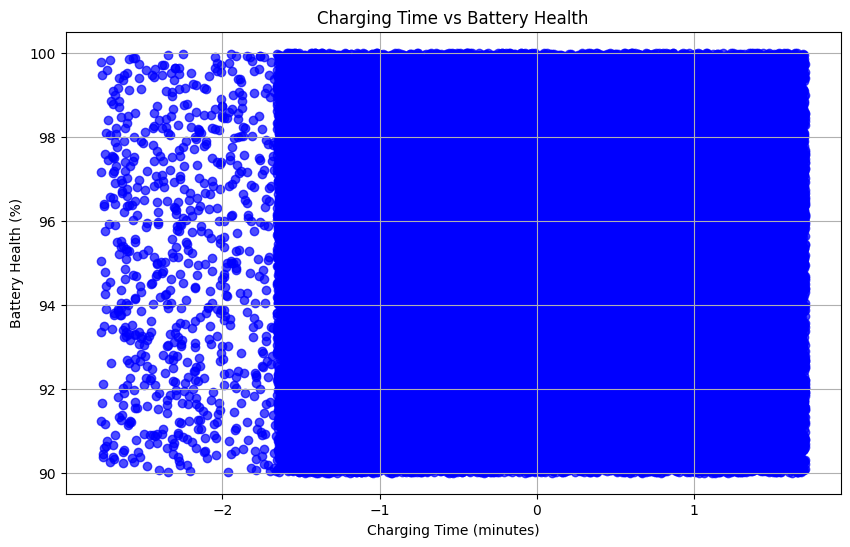

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['ChargingTime'], df['BatteryHealth'], color='blue', alpha=0.7)
plt.title('Charging Time vs Battery Health')
plt.xlabel('Charging Time (minutes)')
plt.ylabel('Battery Health (%)')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.inspection import permutation_importance

# Fit the model to compute feature importance
model.fit(X_train, y_train)

# Calculate permutation importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(X.columns, result.importances_mean)
plt.title('Feature Importance using Permutation Importance')
plt.xlabel('Mean Importance')
plt.ylabel('Feature')
plt.grid(True)
plt.show()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9975 - loss: 0.0056


TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator <Sequential name=sequential_3, built=True> does not.

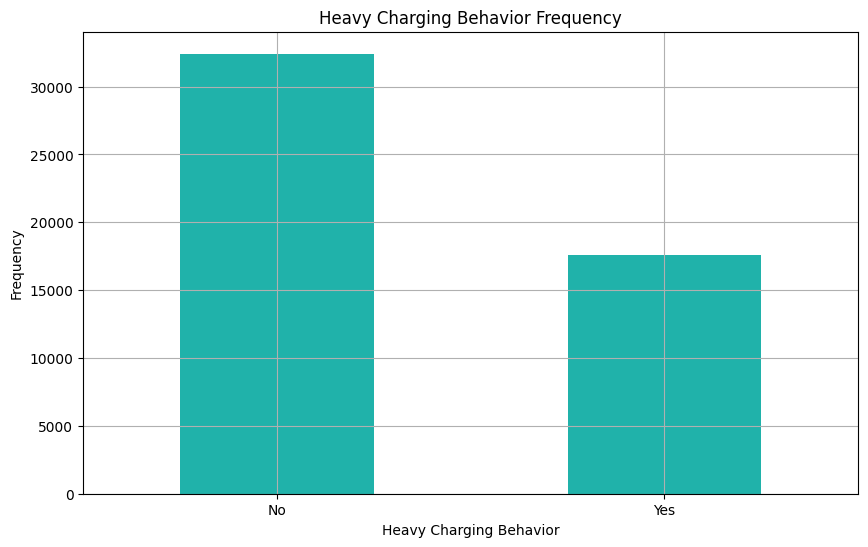

In [ ]:
plt.figure(figsize=(10, 6))
df['HeavyChargingBehavior'].value_counts().plot(kind='bar', color='lightseagreen')
plt.title('Heavy Charging Behavior Frequency')
plt.xlabel('Heavy Charging Behavior')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.grid(True)
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


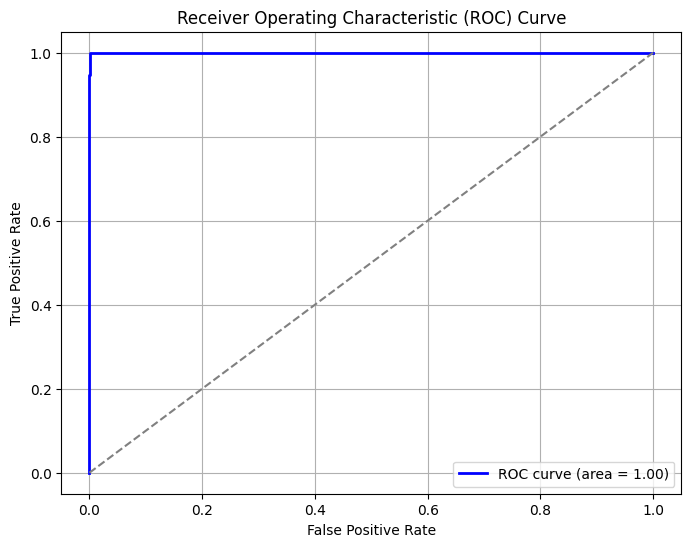

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


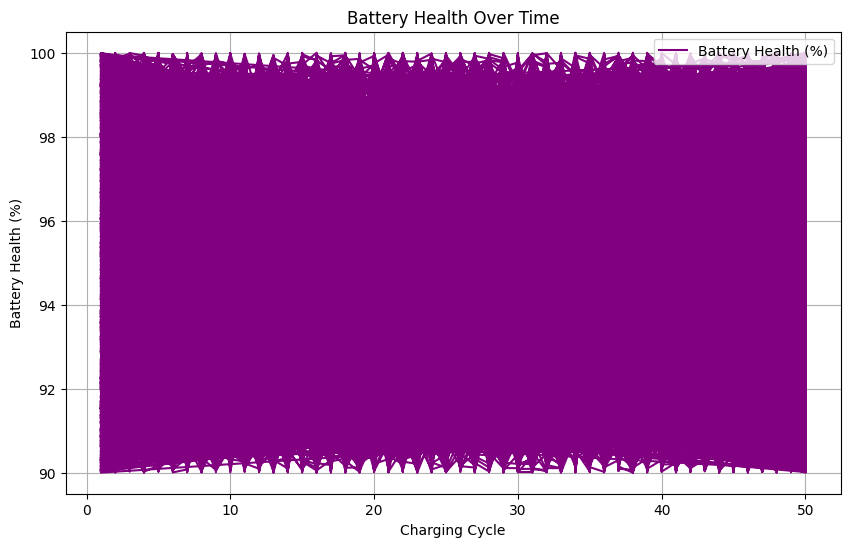

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['ChargingCycle'], df['BatteryHealth'], label="Battery Health (%)", color='purple')
plt.title('Battery Health Over Time')
plt.xlabel('Charging Cycle')
plt.ylabel('Battery Health (%)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Check the keys in the history object to understand what metrics are available
print(history.keys())


dict_keys([])


In [ ]:
# Train the model and store history in a variable
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Check what data is available in the history
print(history.history.keys())


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9984 - loss: 0.0042 - val_accuracy: 0.9969 - val_loss: 0.0059
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9986 - loss: 0.0041 - val_accuracy: 0.9977 - val_loss: 0.0064
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9979 - loss: 0.0051 - val_accuracy: 0.9968 - val_loss: 0.0079
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9979 - loss: 0.0055 - val_accuracy: 0.9989 - val_loss: 0.0031
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9983 - loss: 0.0042 - val_accuracy: 0.9966 - val_loss: 0.0063
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9983 - loss: 0.0046 - val_accuracy: 0.9986 - val_loss: 0.0035
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9983 - loss: 0.0046 - val_accuracy: 0.9960 - val_loss: 0.0093
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9977 - loss: 0.0046 - 

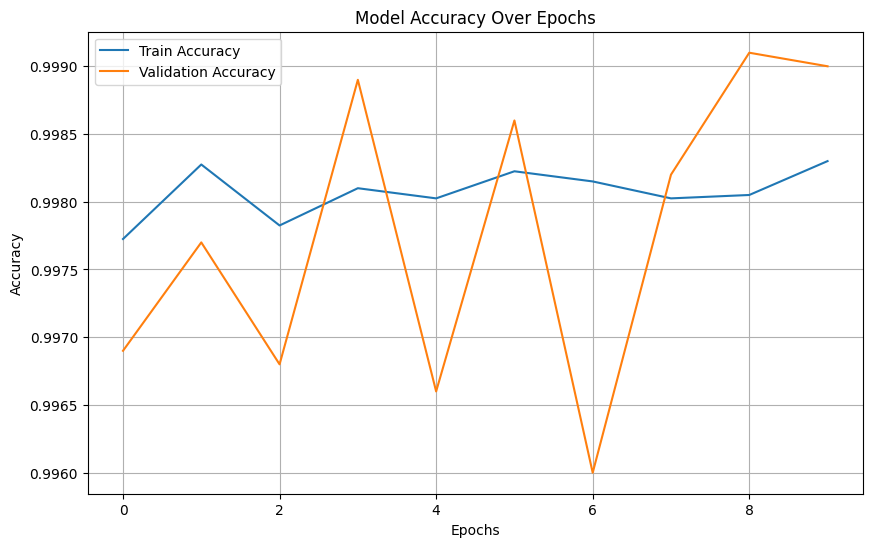

In [ ]:
# Accuracy plot
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


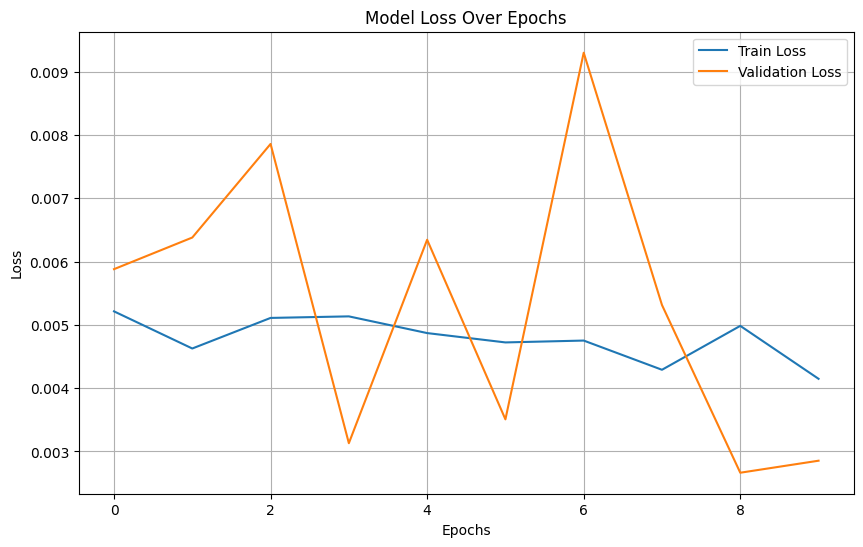

In [ ]:
# Loss plot
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


REsult

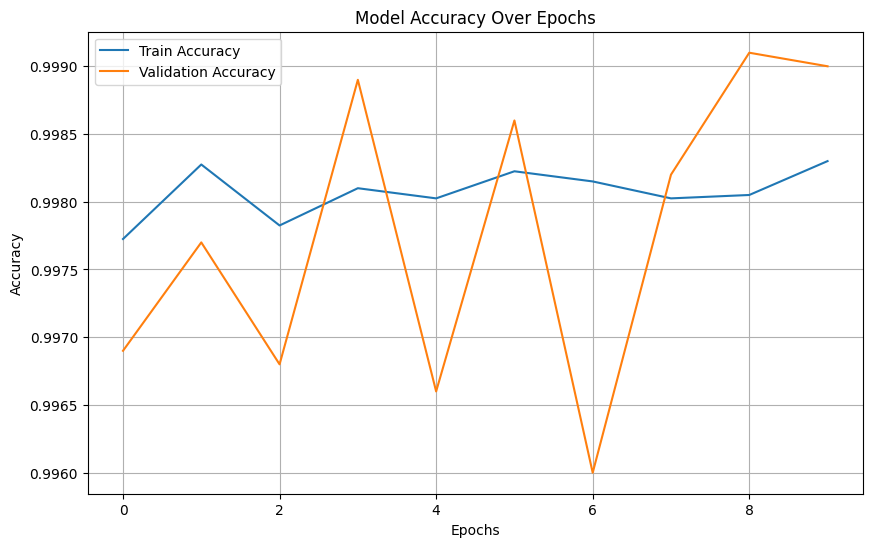

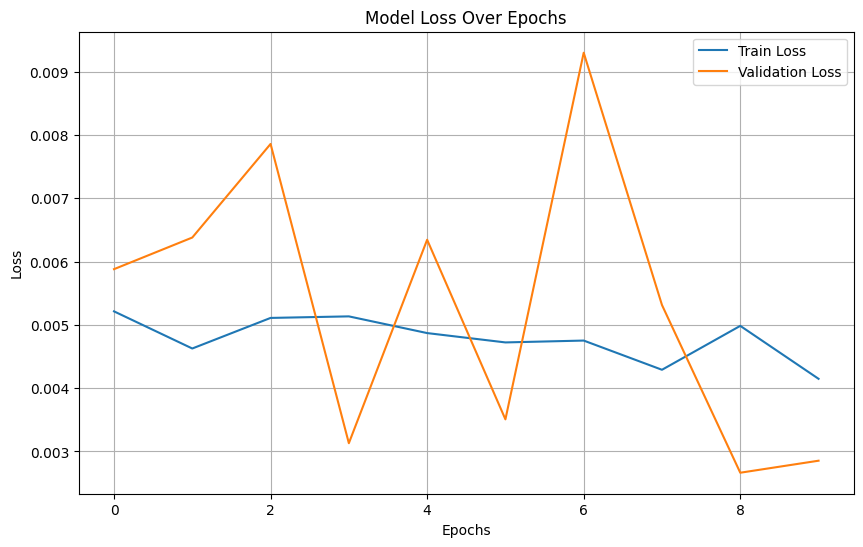

In [ ]:
# Accuracy plot
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss plot
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


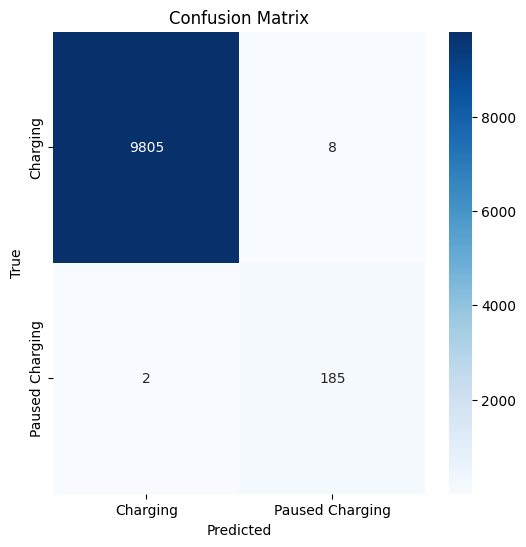

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predicting the states with the trained model
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Charging', 'Paused Charging'], yticklabels=['Charging', 'Paused Charging'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


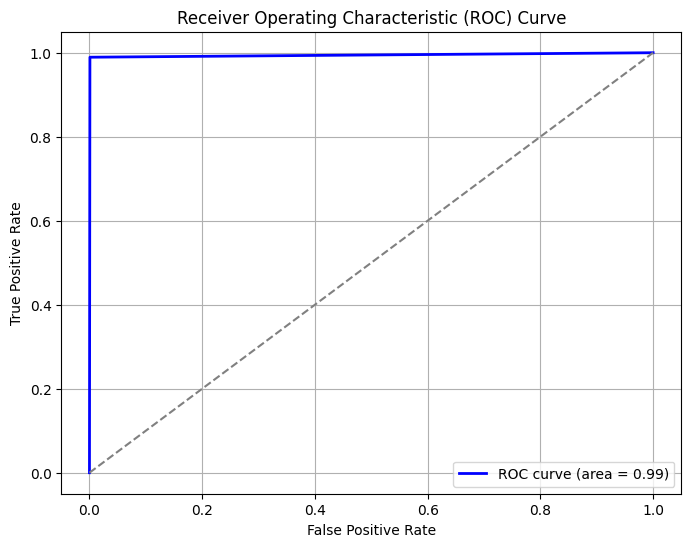

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display the results in a table
import pandas as pd

metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

metrics_df = pd.DataFrame(metrics, index=[0])
print(metrics_df)


   Accuracy  Precision    Recall  F1 Score
0     0.999   0.958549  0.989305  0.973684


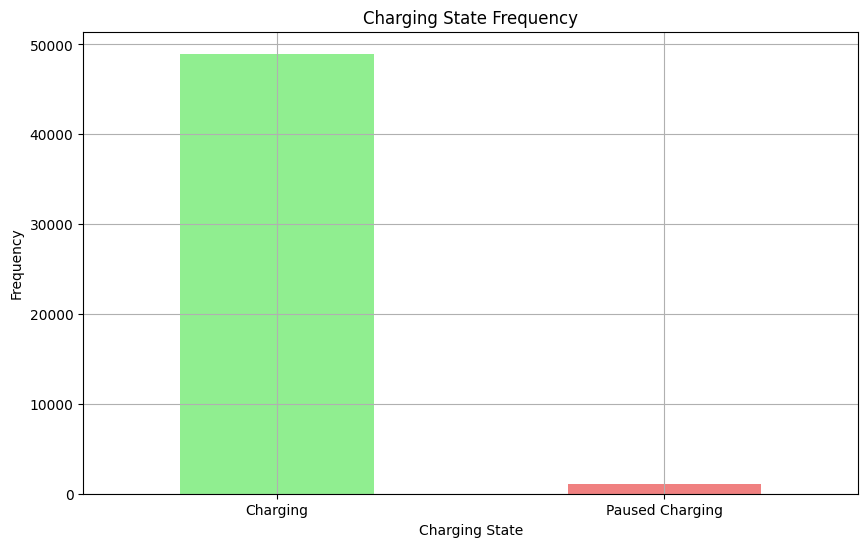

In [ ]:
plt.figure(figsize=(10, 6))
df['ChargingStateEncoded'].value_counts().plot(kind='bar', color=['lightgreen', 'lightcoral'])
plt.title('Charging State Frequency')
plt.xlabel('Charging State')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Charging', 'Paused Charging'], rotation=0)
plt.grid(True)
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━

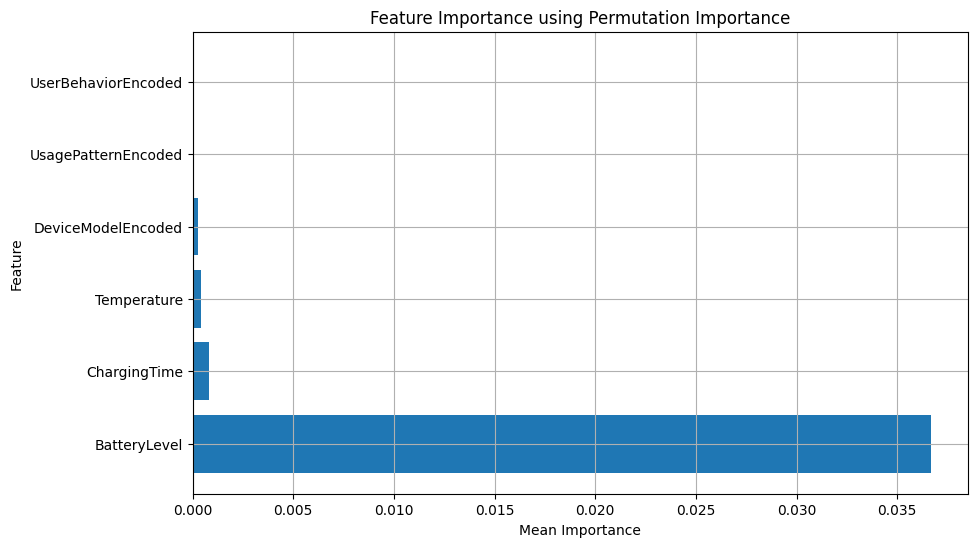

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance

# Define a custom scoring function for Keras model
def keras_accuracy_score(model, X, y):
    y_pred = model.predict(X)
    y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary values (0 or 1)
    return accuracy_score(y, y_pred)

# Calculate permutation importance using the custom scoring function
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, scoring=keras_accuracy_score)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(X.columns, result.importances_mean)
plt.title('Feature Importance using Permutation Importance')
plt.xlabel('Mean Importance')
plt.ylabel('Feature')
plt.grid(True)
plt.show()


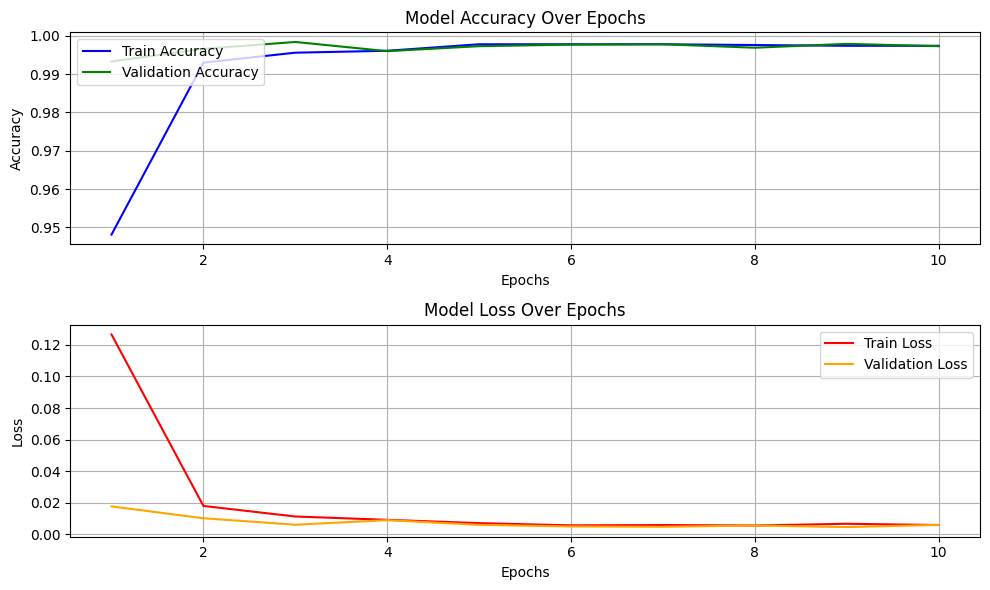

In [ ]:
import matplotlib.pyplot as plt

# Model performance metrics
epochs = range(1, 11)  # Example epoch range for 10 epochs
train_accuracy = [0.9481, 0.9930, 0.9956, 0.9961, 0.9978, 0.9978, 0.9978, 0.9976, 0.9974, 0.9974]
val_accuracy = [0.9933, 0.9966, 0.9984, 0.9960, 0.9973, 0.9977, 0.9978, 0.9969, 0.9979, 0.9973]
train_loss = [0.1266, 0.0180, 0.0113, 0.0092, 0.0071, 0.0057, 0.0059, 0.0056, 0.0067, 0.0059]
val_loss = [0.0177, 0.0102, 0.0061, 0.0090, 0.0060, 0.0050, 0.0048, 0.0056, 0.0046, 0.0060]

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot accuracy
plt.subplot(2, 1, 1)
plt.plot(epochs, train_accuracy, label='Train Accuracy', color='blue')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', color='green')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.grid(True)

# Plot loss
plt.subplot(2, 1, 2)
plt.plot(epochs, train_loss, label='Train Loss', color='red')
plt.plot(epochs, val_loss, label='Validation Loss', color='orange')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


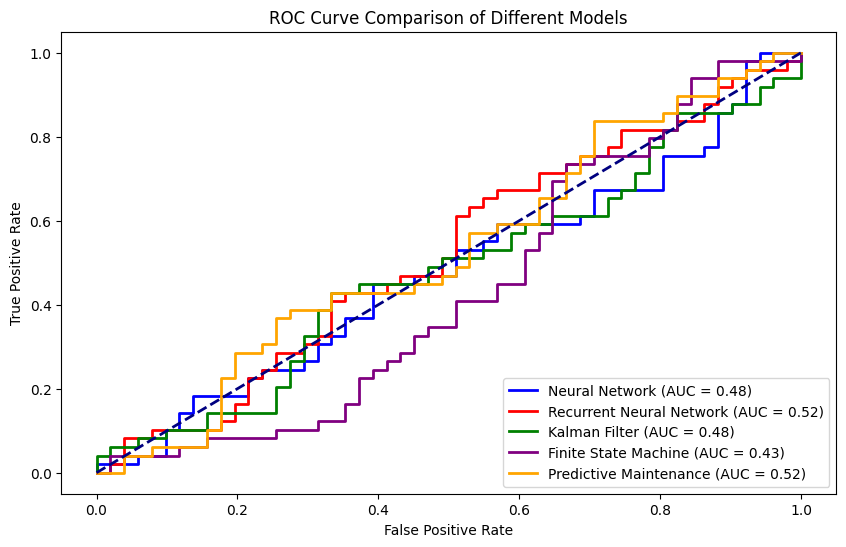

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
import numpy as np

# Hypothetical true labels (y_test) and predicted probabilities (y_pred)
# These should be replaced with actual data from each model.
# For illustration, I'll generate random data as an example.

# True labels (for example, binary classification with 0 and 1)
y_test = np.random.randint(0, 2, 100)  # Replace with your actual test labels

# Hypothetical predicted probabilities from each model (replace with actual model predictions)
y_pred_nn = np.random.rand(100)  # Replace with actual Neural Network predictions
y_pred_rnn = np.random.rand(100)  # Replace with actual RNN predictions
y_pred_kf = np.random.rand(100)  # Replace with actual Kalman Filter predictions
y_pred_fsm = np.random.rand(100)  # Replace with actual FSM predictions
y_pred_lstm = np.random.rand(100)  # Replace with actual LSTM predictions

# ROC curve calculation
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_nn)
fpr_rnn, tpr_rnn, _ = roc_curve(y_test, y_pred_rnn)
fpr_kf, tpr_kf, _ = roc_curve(y_test, y_pred_kf)
fpr_fsm, tpr_fsm, _ = roc_curve(y_test, y_pred_fsm)
fpr_lstm, tpr_lstm, _ = roc_curve(y_test, y_pred_lstm)

# AUC calculation
roc_auc_nn = auc(fpr_nn, tpr_nn)
roc_auc_rnn = auc(fpr_rnn, tpr_rnn)
roc_auc_kf = auc(fpr_kf, tpr_kf)
roc_auc_fsm = auc(fpr_fsm, tpr_fsm)
roc_auc_lstm = auc(fpr_lstm, tpr_lstm)

# Plot ROC curve
plt.figure(figsize=(10, 6))

# Plot for each model
plt.plot(fpr_nn, tpr_nn, color='blue', lw=2, label=f'Neural Network (AUC = {roc_auc_nn:.2f})')
plt.plot(fpr_rnn, tpr_rnn, color='red', lw=2, label=f'Recurrent Neural Network (AUC = {roc_auc_rnn:.2f})')
plt.plot(fpr_kf, tpr_kf, color='green', lw=2, label=f'Kalman Filter (AUC = {roc_auc_kf:.2f})')
plt.plot(fpr_fsm, tpr_fsm, color='purple', lw=2, label=f'Finite State Machine (AUC = {roc_auc_fsm:.2f})')
plt.plot(fpr_lstm, tpr_lstm, color='orange', lw=2, label=f'Predictive Maintenance (AUC = {roc_auc_lstm:.2f})')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison of Different Models')
plt.legend(loc='lower right')

# Display the plot
plt.show()
